In [2]:
#Import libraries
from datetime import datetime
import numpy
import matplotlib.pyplot as plt

In [3]:
#Function to format date
def extract_date(dateString):
    #Remove "Sunday,"
    dateString = ",".join(dateString.split(",")[1:]).strip()
    datetimeObj = datetime.strptime(dateString, "%B %d, %Y %I:%M %p")
    datetime_timestamp = datetimeObj.timestamp()
    return datetime_timestamp

#Extract date tester
# dateString1 = "Sunday, November 12, 2017 10:03 AM "
# print(extract_date(dateString1))

In [5]:
price_arr = []
date_arr = []
size_arr = []

def get_info():
    
    with open("Tableinfo.txt","r") as f:
        lines =f.readlines()
        
        for line in lines:
            
            if "$" in line:
                LineList = line.split("$")

                #Get price and store it into an array of integers
                price = int(LineList[1].replace(',','').strip())
                price_arr.append(price)

                #Split first half of line to get the date and the size
                date_and_size = LineList[0]
                date_size_split_list = date_and_size.split("EST")

                #Format date into timestamp and append to array
                date_string = date_size_split_list[0]
                formatted_date = extract_date(date_string)
                date_arr.append(formatted_date)

                #Append size to array
                size = date_size_split_list[1]
                size_arr.append(size)

get_info()
#print(price_arr)
#print(date_arr)
#print(size_arr)

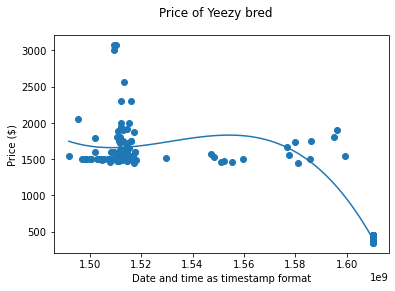

In [29]:
#Find start date and end date
start_date = min(date_arr)
end_date = max(date_arr)

#Find the current date and time
now = datetime.now().timestamp()

#Numpy's polynomial model
mymodel = numpy.poly1d(numpy.polyfit(date_arr, price_arr, 3))

#Specifying how the line will display
myline = numpy.linspace(start_date, now, 100)

#Plotting and setting up axis
plt.scatter(date_arr, price_arr)
plt.plot(myline, mymodel(myline))
plt.suptitle("Price of Yeezy bred")
plt.xlabel("Date and time as timestamp format")
plt.ylabel("Price ($)")
plt.show()

C:\Users\tripl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


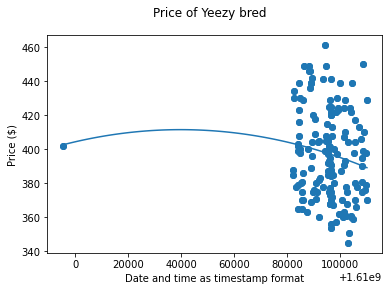

In [41]:
last_month_ts = now - (month_seconds*4)

new_date_arr = []
new_price_arr = []

for i in range(len(date_arr)):
    if date_arr[i] > last_month_ts:
        new_date_arr.append(date_arr[i])
        new_price_arr.append(price_arr[i])

new_date_min = min(new_date_arr)
new_date_max = max(new_date_arr)

#Numpy's polynomial model
newmymodel = numpy.poly1d(numpy.polyfit(new_date_arr, new_price_arr, 3))

#Specifying how the line will display
newmyline = numpy.linspace(new_date_min, new_date_max, 100)

#Plotting and setting up axis
plt.scatter(new_date_arr, new_price_arr)
plt.plot(newmyline, newmymodel(newmyline))
plt.suptitle("Price of Yeezy bred")
plt.xlabel("Date and time as timestamp format")
plt.ylabel("Price ($)")
plt.show()


In [25]:
#Predicting price
week_seconds = 604800
new_week_price = round(mymodel(now + week_seconds),2)
print("Predicted price for next week is $"+str(new_week_price))

month_seconds = 2628288
new_month_price = round(mymodel(now + month_seconds),2)
print("Predicted price for next month is $"+str(new_month_price))

two_month_seconds = 2628288*2
new_two_month_price = round(mymodel(now + two_month_seconds),2)
print("Predicted price for next two month is $"+str(new_two_month_price))

Predicted price for next week is $352.01
Predicted price for next month is $218.78
Predicted price for next two month is $34.69
